In [1]:
import qiskit
import numpy as np
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.visualization import plot_histogram
from math import pi, sqrt

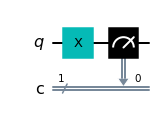

In [2]:
 ## For the Not Gate
qc_not = QuantumCircuit(1,1, name = 'qc')
qc_not.x(0)
qc_not.measure(0,0)
qc_not.draw('mpl')


Total counts are: {'1': 1000}


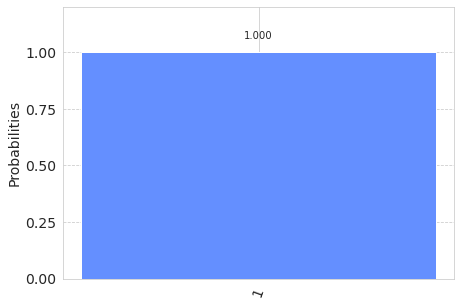

In [3]:
 ## to execute the qasm

backend = Aer.get_backend("qasm_simulator")
job = execute(qc_not, backend, shots=1000)
result = job.result()

counts = result.get_counts(qc_not)
print("\nTotal counts are:", counts)

## plot a histogram
plot_histogram(counts)

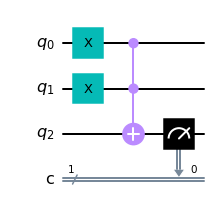

In [4]:
## The And Gate can be implemented using the tofoli
qc_and = QuantumCircuit(3,1, name = "qc")

qc_and.x(0)
qc_and.x(1)

qc_and.ccx(0,1,2)

qc_and.measure(2,0)
qc_and.draw('mpl')

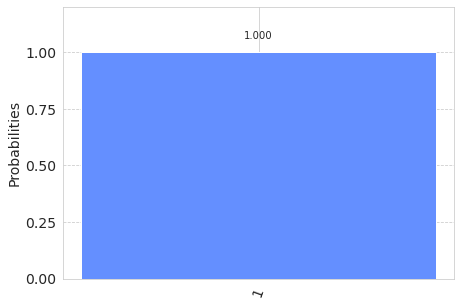

In [5]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc_and, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc_and)
plot_histogram(counts)

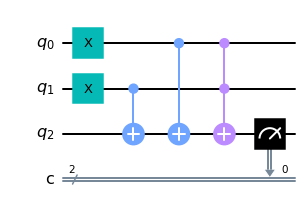

In [6]:
## For the OR gATE
qc_or = QuantumCircuit(3,2, name="qc")

qc_or.x(0)
qc_or.x(1)

qc_or.cx(1,2)
qc_or.cx(0,2)
qc_or.ccx(0,1,2)

qc_or.measure(2,0)

qc_or.draw('mpl')

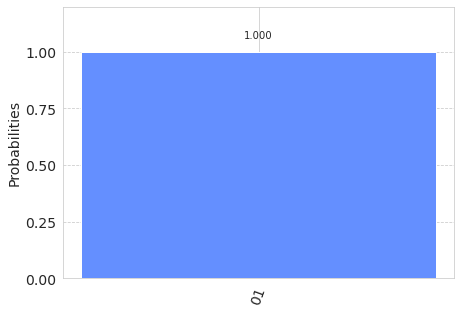

In [7]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc_or, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc_or)
plot_histogram(counts)

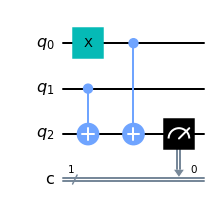

In [8]:
## Implementation of XOR gate with two cnots
qc_xor = QuantumCircuit(3,1, name= "qc")

qc_xor.x(0)

qc_xor.cx(1,2)
qc_xor.cx(0,2)

qc_xor.measure(2,0)

qc_xor.draw("mpl")

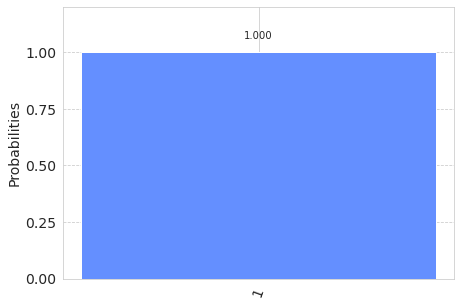

In [9]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc_xor, backend, shots = 1000)
result = job.result()
counts = result.get_counts(qc_xor)

plot_histogram(counts)

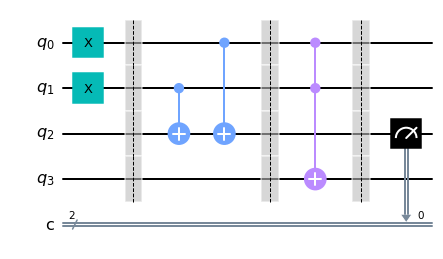

In [11]:
### Implementing HAlf Adder circuit

qc_ha = QuantumCircuit(4,2, name = "qc")

## Initialize qubits to |11>
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

##Xor implementation
qc_ha.cx(1,2)
qc_ha.cx(0,2)
qc_ha.barrier()

##AND Gate implementation
qc_ha.ccx(0,1,3)
qc_ha.barrier()

##Sum
qc_ha.measure(2,0)

qc_ha.draw('mpl')


Total counts are: {'00': 1000}


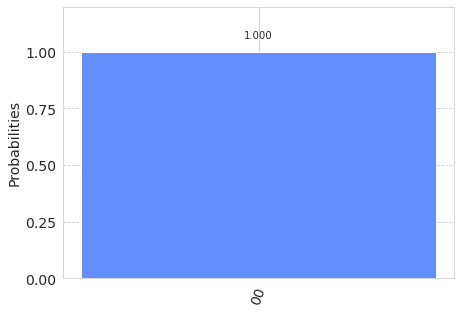

In [12]:
backend = Aer.get_backend("qasm_simulator")

job = execute(qc_ha, backend, shots = 1000)

result = job.result()

counts = result.get_counts(qc_ha)
print("\nTotal counts are:", counts)

plot_histogram(counts)

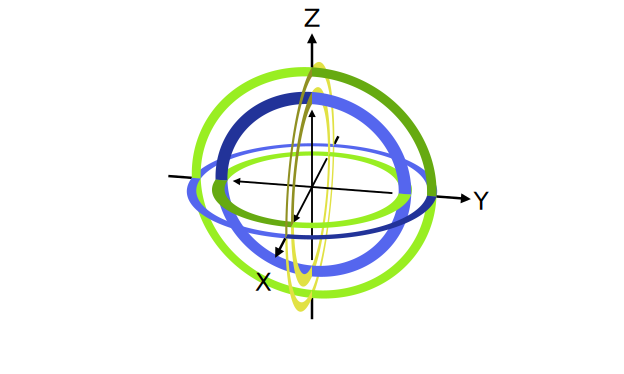

In [16]:
from bloch_sphere.animate_bloch import do_or_save_animation, AnimState
@do_or_save_animation('my_animation', save=False, fps=30, preview=True)

def animate(state: AnimState):
    state.x_gate()
    state.y_gate()
    state.z_gate()
    state.h_gate()
    ...
    state.wait()

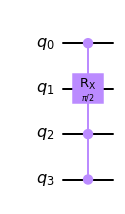

In [17]:
 from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import  HGate, IGate, RXGate


##Define custom gate
custom = RXGate(pi/2).control(3)

##Define quantum circuit
qc2 = QuantumCircuit(4)
qc2.append(custom, [0,2,3,1])
qc2.draw("mpl")

In [23]:
from ibm-quantum-widgets import CircuitComposer
editor = CircuitComposer
editor

SyntaxError: invalid syntax (4270991341.py, line 1)

In [18]:
## SYntax for running on real device

from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy


##set provider
provider = IBMQ.load_acount()
provider = IBMQ.get_provider('ibm-q')

In [ ]:
## Set device
device = least_busy(provider.backends(filters= lambda x: x.configurations().nqubits >=2 and
                                      not x.configurations().simulator and x.status().operational == True))

In [ ]:
print("RUnning on current least busy device: ", device)

## set provider
from qiskit.tools.monitor import job_monitor
transpiled = transpile(circuit, device, optimization_level=3)
job = device.run(transpiled, shots=1024)
job_monitor(job, interval = 2)

results = job.result()
counts = results.get_counts(circuit)

In [9]:
from qiskit.visualization import plot_state_qsphere


## THIS IS A HELPER FUNCTION THAT AUTOMATES REPETITIVE STUFFS EXECUTING AND VISUALIZING THE CIRCUITS

##WIll execute the circuit on the state vector (sv) simulator
##Returns state vector resultsm circuit diagram, and QSphere


def execute_circuit_sv(quantum_circuit):
    ##create a state vector simulator
    statevector_simulator = Aer.get_backend('statevector_simulator')

    #execute the circuit on the simulator
    result = execute(quantum_circuit,statevector_simulator).result()
    ##Assign state vector results
    statevector_results = result.get_statevector(quantum_circuit)

    ##Draw the circuit diagram
    circuit_diagram = quantum_circuit.draw('mpl')

    #draw the QSPhere
    q_sphere = plot_state_qsphere(statevector_results)

    ##Return the result, circuit diagram and Osphere
    return statevector_results, circuit_diagram, q_sphere

    ##

In [14]:
##I will use the helper function to execute the x gate operation
#X-gate
#Create the single qubit circuit

qc = QuantumCircuit(1)

#Add an X gate to the qubit
qc.x(0)
qc.z(0)
##Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)

In [15]:
result

Statevector([ 6.123234e-17+0.0000000e+00j, -1.000000e+00-1.2246468e-16j],
            dims=(2,))


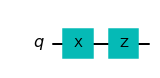

In [16]:
img

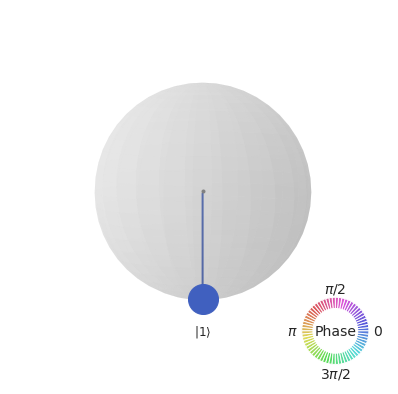

In [17]:
qsphere

In [18]:
##Helper function for qasm simulator

def execute_circuit(quantum_circuit):
    ##create a qasm simulator
    simulator = Aer.get_backend('qasm_simulator')

    ##execute the circuit on the simulator
    result = execute(quantum_circuit, simulator, shots=1024).result()

    ##Get the result counts
    results = result.get_counts(quantum_circuit)

    #draw the circuit diagram
    circuit_diagram = quantum_circuit.draw()

    ##create a histogram of the results
    histogram = plot_histogram(results)

    ##return the results, circuit diagram, and histogram
    return result, circuit_diagram, histogram

In [19]:
## CNOT-gate
##create a two qubit circuit

qc = QuantumCircuit(2)
##Add a CNOT gate where, control = first, target = second qubit

qc.cx(0,1)

#measure all qubits and send results to classical bits
qc.measure_all()

##execute the circuit and capture all the results
result, img, histogram = execute_circuit_sv(qc)

In [20]:
result

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


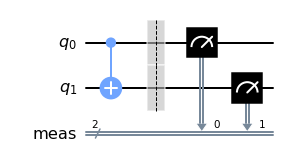

In [21]:
img

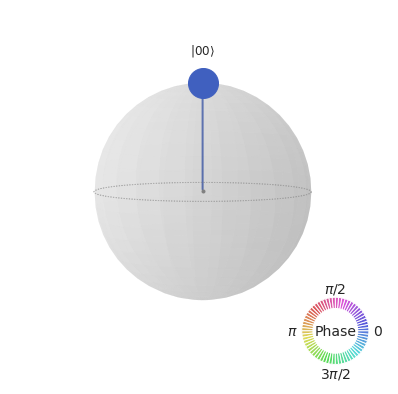

In [22]:
histogram

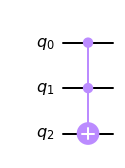

In [24]:
##Decomposition of a Toffoli gate
""" An analogy of this is to think of the Toffoli gate as a car. When you decompose a car down a level, you are now looking at the components that
make up the car, such as the engine, hood, wheels, seats, doors, rearview mirror and so on. The following steps will provide a  refresher to what
this looks like
"""

##Basic Toffoli gate,
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw('mpl')

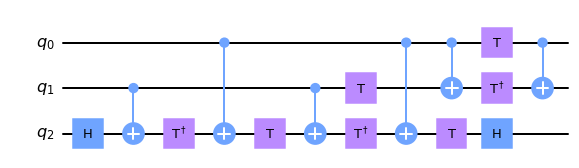

In [26]:
## To decompose the Toffoli gate down to level to its representative gates

qc_decompose = qc.decompose()
qc_decompose.draw('mpl')

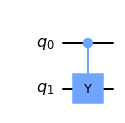

In [7]:
from qiskit.circuit.library import YGate
from qiskit import QuantumCircuit
qc_enhance = QuantumCircuit(2)
qc_enhance.append(YGate().control(1), [0,1])

qc_enhance.draw('mpl')

In [4]:

qc_multi = QuantumCircuit(4)
qc_multi.append(custom_gate.control(2), [0,3,1,2])
qc_multi.draw('mpl')

NameError: name 'custom_gate' is not defined

In [19]:
## composing two circuits
qc1 = QuantumCircuit(2,2)
qc1.x(0)

qc2 = QuantumCircuit(2,2)
qc2.z(0)
qc2.barrier()

qc2.measure([0,1], [0,1])

qc3 = qc1.compose(qc2)

In [20]:
qc3 = qc1 + qc2

/tmp/ipykernel_37497/3350404453.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc3 = qc1 + qc2


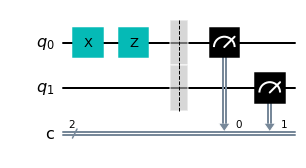

In [21]:
qc3.draw('mpl')


/tmp/ipykernel_37497/776445921.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  (qc1 + qc2).draw('mpl')


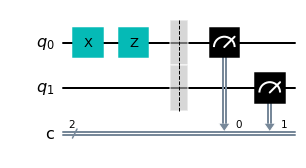

In [22]:
(qc1 + qc2).draw('mpl')

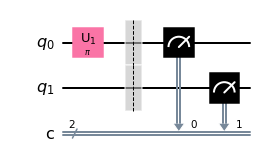

In [23]:
qc2.decompose().draw('mpl')

In [25]:
## combining twi density matrix objects into a single matrix using the tensor method
from qiskit.quantum_info import DensityMatrix
matrix1 = [[1+0.j, 0.5+0.j], [0.5+0.j, 1+0.j]]
matrix2 = [[0.5+0.j, 1+0.j], [0.5+0.j, 1+0.j]]

matrix = DensityMatrix(matrix1)
matrix.tensor(matrix2)

DensityMatrix([[0.5 +0.j, 1.  +0.j, 0.25+0.j, 0.5 +0.j],
               [0.5 +0.j, 1.  +0.j, 0.25+0.j, 0.5 +0.j],
               [0.25+0.j, 0.5 +0.j, 0.5 +0.j, 1.  +0.j],
               [0.25+0.j, 0.5 +0.j, 0.5 +0.j, 1.  +0.j]],
              dims=(2, 2))


In [27]:
## S to TT
qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)

qc1.h(0)
qc1.s(0)

qc2.h(0)
qc2.t(0)
qc2.t(0)

print(average)

NameError: name 'average' is not defined

In [28]:
##measuring average gate and process fidelity
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import SGate
from qiskit.quantum_info import average_gate_fidelity, process_fidelity
import numpy as np

gate1 = Operator(SGate())
gate2 = np.exp(1j/2) * gate1

print(average_gate_fidelity(gate1, gate2))
print(process_fidelity(gate1, gate2))


1.0
1.0


In [ ]:
"""
Quantum fidelity allows you to obtain a measurement of the amount of distance between two quantum gates, states, or processes.

As a formal definition, states that quantum fidelity is a measure of how "close" two quantum states are , in that one state will effectively
identify as another.


As a rule of thumb, fidelity is simply measuring the amount of "noise" that you can expect between your code and actual physical quantum hardware.



state fidelity measures the noise within a quantum circuit or operator.

Average gate fidelity measures the fidelity of multiple gates within a quantum channel. Note, average gate fidelity requires the channel and target operator to have the same dimensions and input/output dimensions.
"""




In [29]:
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import SGate, ZGate

gate1 = Operator(SGate())
gate2 = Operator(ZGate())

print(average_gate_fidelity(gate1, gate2))
print(process_fidelity(gate1, gate2))

0.6666666666666666
0.5000000000000001


In [30]:
##S-gate is equivalent to two T-gates or a Z-gate being rquivalent to two S-gates.

qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)

qc1.h(0)
qc1.s(0)

qc2.h(0)
qc2.t(0)
qc2.t(0)

print(average_gate_fidelity(qc1, qc2))
print(process_fidelity(qc1, qc2))

0.9999999999999997
0.9999999999999994


/home/madjnr/anaconda3/lib/python3.9/site-packages/qiskit/quantum_info/operators/measures.py:381: UserWarning: Treating array input as a SuperOp object
  warnings.warn(f"Treating array input as a {fallback_class.__name__} object")
/home/madjnr/anaconda3/lib/python3.9/site-packages/qiskit/quantum_info/operators/measures.py:381: UserWarning: Treating array input as a Operator object
  warnings.warn(f"Treating array input as a {fallback_class.__name__} object")


In [31]:
qc3 = QuantumCircuit(1)
qc4 = QuantumCircuit(1)

qc3.h(0)
qc3.z(0)

qc4.h(0)
qc4.s(0)
qc4.s(0)

print(average_gate_fidelity(qc3, qc4))
print(average_gate_fidelity(qc3, qc4))

0.9999999999999997
0.9999999999999997


/home/madjnr/anaconda3/lib/python3.9/site-packages/qiskit/quantum_info/operators/measures.py:381: UserWarning: Treating array input as a SuperOp object
  warnings.warn(f"Treating array input as a {fallback_class.__name__} object")
/home/madjnr/anaconda3/lib/python3.9/site-packages/qiskit/quantum_info/operators/measures.py:381: UserWarning: Treating array input as a Operator object
  warnings.warn(f"Treating array input as a {fallback_class.__name__} object")


In [32]:
print(average_gate_fidelity(qc1, qc3))

0.6666666666666665


/home/madjnr/anaconda3/lib/python3.9/site-packages/qiskit/quantum_info/operators/measures.py:381: UserWarning: Treating array input as a SuperOp object
  warnings.warn(f"Treating array input as a {fallback_class.__name__} object")
/home/madjnr/anaconda3/lib/python3.9/site-packages/qiskit/quantum_info/operators/measures.py:381: UserWarning: Treating array input as a Operator object
  warnings.warn(f"Treating array input as a {fallback_class.__name__} object")


In [35]:
###Measuring State fidelity
from qiskit.quantum_info import state_fidelity
from qiskit import Aer, execute
qc1 = QuantumCircuit(2)
qc2 = QuantumCircuit(2)

qc1.h(0)
qc1.h(1)
qc2.h([0,1])

backend = Aer.get_backend('statevector_simulator')

sv1 = execute(qc1, backend).result().get_statevector(qc1)
sv2 = execute(qc2, backend).result().get_statevector(qc2)

print(state_fidelity(sv1, sv2))

## The result one means that both quantum circuits are equivalent

1.0


In [38]:
qc1 = QuantumCircuit(2)
qc2 = QuantumCircuit(2)

qc1.h(0)
qc1.h(1)
qc2.h(0)

backend = Aer.get_backend('statevector_simulator')

sv1 = execute(qc1, backend).result().get_statevector(qc1)
sv2 = execute(qc2, backend).result().get_statevector(qc2)

print(state_fidelity(sv1, sv2))

0.5000000000000001


In [40]:
##Visualizing a state vector
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

state_vector = Statevector.from_label('00')
state_vector_ev = state_vector.evolve(qc)
state_vector_ev.draw('mpl')

ValueError: 'mpl' is not a valid option for drawing Statevector objects. Please choose from:
            'text', 'latex', 'latex_source', 'qsphere', 'hinton',
            'bloch', 'city' or 'paulivec'.

In [ ]:
figure = state_vector_ev.draw('qsphere')
figure.savefig

In [1]:
import qiskit
qiskit.__qiskit_version__


{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
"""
When executing a circuit on a backend, the transpiler identifies any constraints that the backend may have with respect to your circuit and optimizes the circuit accordingly.


Once the constraints are identified and an optimization level is set, the transiler will package up the circuit in such a way that the transpiler ensures that the circuit to be executed on the quantum device adheres to the constraints of the backend and is optimized accordindly, as described above.
"""

In [2]:
##import the transpiler passes object
from qiskit.transpiler import passes
print(dir(passes))

['ALAPSchedule', 'ALAPScheduleAnalysis', 'ASAPSchedule', 'ASAPScheduleAnalysis', 'AlignMeasures', 'ApplyLayout', 'BIPMapping', 'BarrierBeforeFinalMeasurements', 'BasicSwap', 'BasisTranslator', 'CSPLayout', 'CXCancellation', 'CXDirection', 'CheckCXDirection', 'CheckGateDirection', 'CheckMap', 'Collect1qRuns', 'Collect2qBlocks', 'CollectLinearFunctions', 'CollectMultiQBlocks', 'CommutationAnalysis', 'CommutativeCancellation', 'ConsolidateBlocks', 'ConstrainedReschedule', 'ContainsInstruction', 'CountOps', 'CountOpsLongestPath', 'CrosstalkAdaptiveSchedule', 'DAGFixedPoint', 'DAGLongestPath', 'Decompose', 'DenseLayout', 'Depth', 'DynamicalDecoupling', 'EchoRZXWeylDecomposition', 'EnlargeWithAncilla', 'Error', 'FixedPoint', 'FullAncillaAllocation', 'GateDirection', 'GatesInBasis', 'HoareOptimizer', 'InstructionDurationCheck', 'InverseCancellation', 'Layout2qDistance', 'LayoutTransformation', 'LinearFunctionsSynthesis', 'LinearFunctionsToPermutations', 'LookaheadSwap', 'MergeAdjacentBarriers

In [ ]:
"""
Passes are generally used to transform circuits so that they are set up to perform as optimally as desired
"""

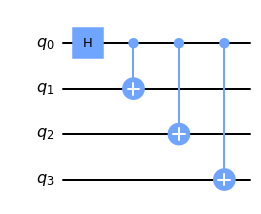

In [5]:
#Quantum circuit with a single and multi-qubit gates
from qiskit import QuantumCircuit
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw('mpl')

In [8]:
##get the backend device: ibmq_santiago
from qiskit.providers import providers
backend_santiago = provider.get_backend('ibmq_santiago')
backend_santiago

ImportError: cannot import name 'providers' from 'qiskit.providers' (/home/madjnr/anaconda3/lib/python3.9/site-packages/qiskit/providers/__init__.py)

In [ ]:
##Transpile the circuit with an optimization level = 0
ac_santiago_0 = transpile(qc,backend_santiago, seed_transpiler=10258, optimization_level=0)

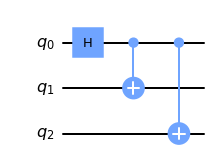

In [9]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx([0,0], [1,2])

ghz.draw('mpl')

In [12]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(0, 2**3)
state_ev = state.evolve(ghz)
state_ev.draw('latex')

<IPython.core.display.Latex object>

In [13]:
state = Statevector.from_label('000')
state_ev = state.evolve(ghz)
state_ev.draw('latex')

<IPython.core.display.Latex object>

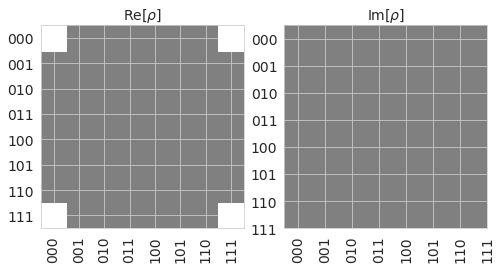

In [14]:
state_ev.draw('hinton')

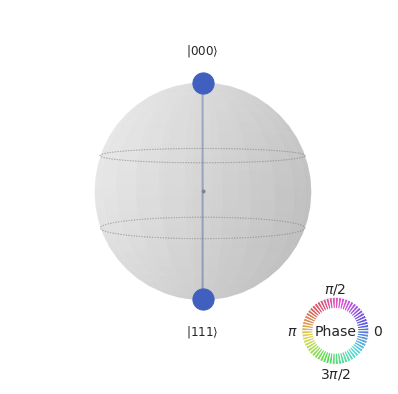

In [15]:
from qiskit.visualization import plot_state_qsphere, plot_state_paulivec

plot_state_qsphere(state_ev)

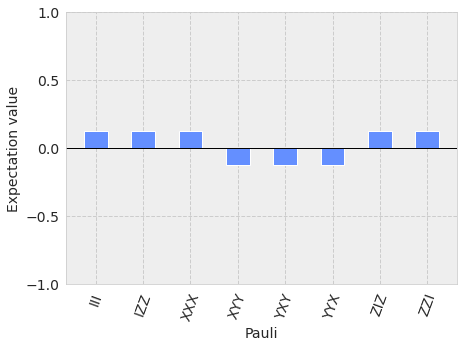

In [16]:
plot_state_paulivec(state_ev)

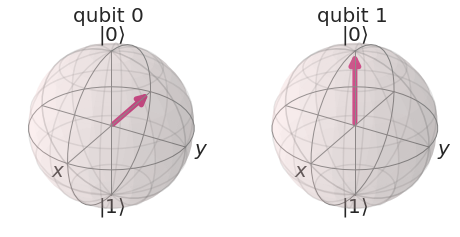

In [20]:
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumRegister, BasicAer, execute
quantum_a = QuantumRegister(1, 'q_a')

quantum_b = QuantumRegister(1, 'q_b')

qc = QuantumCircuit(quantum_a, quantum_b)

qc.h(0)
qc.z(0)

backend = BasicAer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
state = result.get_statevector()
plot_bloch_multivector(state)

In [21]:
## We can also create an operator forms of circuits
from qiskit.quantum_info import Operator
U = Operator(ghz)
U.data


array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [24]:
import numpy as np
np.around(U.data, 3)

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

In [28]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity

op_a = Operator(XGate())
op_b = np.exp(1j / 2) * op_a

a = average_gate_fidelity(op_a, op_b)
a

1.0

In [29]:
b = process_fidelity(op_a, op_b)

a == b

True

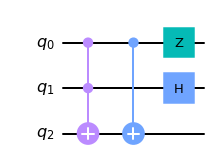

In [36]:
## we can wrap up circuits with .to_gate() method

qc = QuantumCircuit(3)
qc.mct([0,1],2)
qc.cx(0,2)
qc.h(1)
qc.z(0)
qc.draw('mpl')

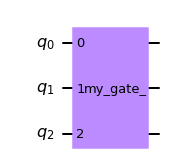

In [37]:
qc_gate = qc.to_gate()
qc_gate.name = 'my_gate_'
circ = QuantumCircuit(3)
circ.append(qc_gate, [0,1,2])
circ.draw('mpl')

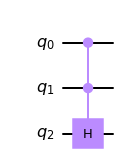

In [38]:
## We can also actually create custom controlled-gates

from qiskit.circuit.library import HGate
ch = HGate().control(2)
qc = QuantumCircuit(3)
qc.append(ch, [0,1,2])
qc.draw('mpl')

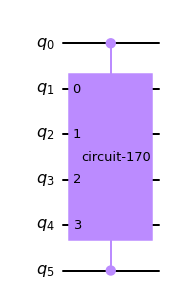

In [42]:
circ = QuantumCircuit(4)
circ.h(range(2))
#circ.cx(0,1)
circ.cx(0,1)
circ.cx(0,3)
circ.crz(np.pi/2, 0,2)

my_gate = circ.to_gate().control(2)
qc = QuantumCircuit(6)
qc.append(my_gate, [0,5,1,2,3,4])
qc.draw('mpl')

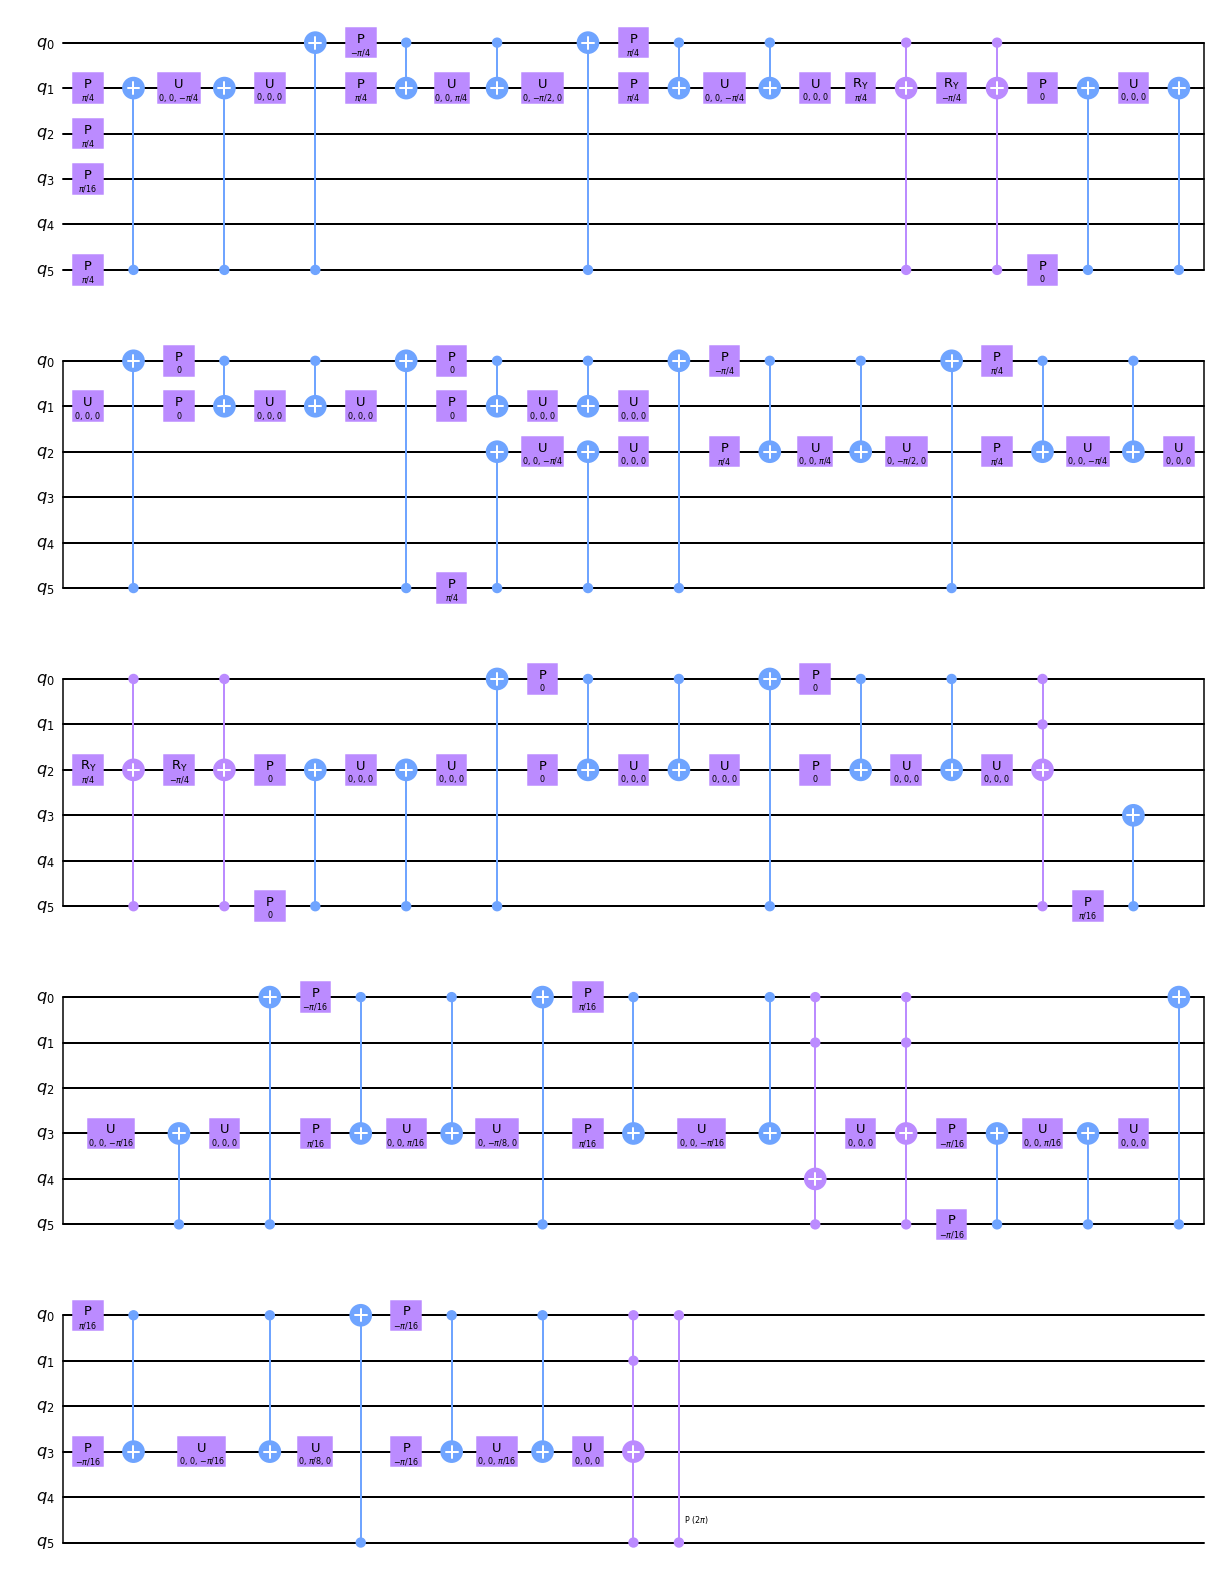

In [43]:
circ = qc.decompose()
circ.draw('mpl')

In [44]:
## The pattern of rotation

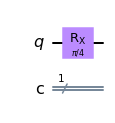

In [43]:
##RX Gate
from math import pi
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector
theta_x = pi/4

qc_rx = QuantumCircuit(1,1, name = 'qc')

qc_rx.rx(theta_x, 0)
qc_rx.draw(output = 'mpl')


Quantum state is: Statevector([0.924+0.j   , 0.   -0.383j],
            dims=(2,))


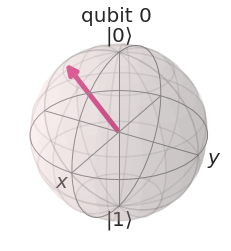

In [44]:
backend = Aer.get_backend('statevector_simulator')

result = execute(qc_rx, backend).result().get_statevector(qc_rx, decimals=3)

print("\nQuantum state is:", result)

plot_bloch_multivector(result)

In [33]:
backend = Aer.get_backend('unitary_simulator')

rx_unitary = execute(qc_rx, backend)

rx_unitary.result().get_unitary(qc_rx, decimals=3)

Operator([[0.707+0.j   , 0.   -0.707j],
          [0.   -0.707j, 0.707+0.j   ]],
         input_dims=(2,), output_dims=(2,))

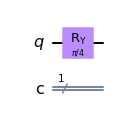

In [41]:
## RY Gate

"""
The trick you have to rememeber is that the controled x gate rotate about the y-axis while the controled y gate rotates about the x-axis.
"""
theta_y = pi/4

qc_ry = QuantumCircuit(1,1, name ='qc')
qc_ry.ry(theta_y, 0)
qc_ry.draw('mpl')


Quantum state: Statevector([0.924+0.j, 0.383+0.j],
            dims=(2,))


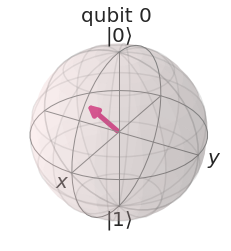

In [42]:
backend = Aer.get_backend('statevector_simulator')

result = execute(qc_ry, backend).result().get_statevector(qc_ry, decimals=3)

print('\nQuantum state:', result)

plot_bloch_multivector(result)

In [46]:
backend = Aer.get_backend('unitary_simulator')

execute(qc_ry, backend).result().get_unitary(qc_ry, decimals=3)

Operator([[ 0.924+0.j, -0.383+0.j],
          [ 0.383+0.j,  0.924+0.j]],
         input_dims=(2,), output_dims=(2,))

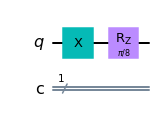

In [52]:
 ###RZ Gate
theta_z = pi/8
qc_rz = QuantumCircuit(1,1, name='qc')
qc_rz.x(0)
qc_rz.rz(theta_z, 0)
qc_rz.draw('mpl')


Quantum state is: Statevector([-0.   +0.j   ,  0.981+0.195j],
            dims=(2,))


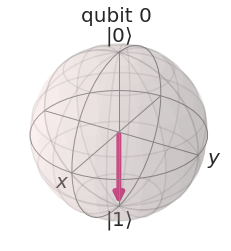

In [53]:
backend = Aer.get_backend('statevector_simulator')

result = execute(qc_rz, backend).result().get_statevector(qc_rz, decimals=3)

print("\nQuantum state is:", result)

plot_bloch_multivector(result)

In [49]:
backend = Aer.get_backend('unitary_simulator')

rz_unitary = execute(qc_rz, backend)

rz_unitary.result().get_unitary(qc_rz, decimals=3)

Operator([[ 0.+0.j, -1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

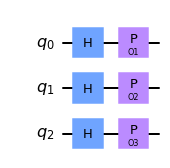

In [4]:
from qiskit.circuit import Parameter
import math
theta1 = Parameter('O1')
theta2 = Parameter('O2')
theta3 = Parameter('O3')

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.p(theta1, 0)
qc.p(theta2, 1)
qc.p(theta3, 2)
qc.draw('mpl')

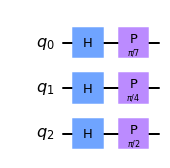

In [6]:
b_qc = qc.bind_parameters({theta1 : math.pi/7,
                           theta2 : math.pi/4,
                           theta3 : math.pi/2})

b_qc.draw('mpl')

In [7]:
from qiskit.circuit.QuantumCircuit import compose

ModuleNotFoundError: No module named 'qiskit.circuit.QuantumCircuit'

In [8]:
from qiskit.circuit.QuantumCircuit import copy

ModuleNotFoundError: No module named 'qiskit.QuantumCircuit'